# Determining if a cancer is malignant or benign  (50 points)



## Dataset

#### Important: Please use the included .csv files: 

- training_data.csv: use for training and metrics (task 1 and 2)

- prediction_data.csv: use for prediction (task 3)

Data Description:

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

## Tasks
1. Train classification models to predict whether a given breast cancer sample is malignant (M) or benign (B). [20 points]
  - Use data from training_data.csv for training.

2. Determine which model you selected performs the best: [20 points]
  - get the model score
  - use classification_report
  - use confusion_matrix
  - [Important] state which model is the best performing one and why

3. Demonstrate how you will use the model in deployment [10 points]
  - Use data from prediction_data.csv
  - Get a prediction from your best model, print out the prediction (malignant or benign).

## Passing Requirements
- To pass the assessment, you should compare at least 2 types of models (there is no upper limit).
    - The model performance doesn't have to be the best possible, as long as you demonstrate how you compared them.
    
    
## Submission
Please submit your completed work to the instructor using a Slack *private* message. 

*Important*: don't submit to the whole class through Slack!

In [1]:
Grade = 41
Comment = """Excellent work for the Training and Evaluation sections!
The analysis for the selection of the SVC model is clear, well done!

For the Prediction section, points could not be awarded because
you were asked to get predictions for the 4 rows of prediction data.
"""

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

## Train Classification Models (20 points)

Train classification models to predict whether a given breast cancer sample is malignant (M) or benign (B). [20 points]
  - Use data from training_data.csv for training.
  
Follow the steps below to transform the dataset and train your models.

### A. Load and Clean data

#### Load data

In [3]:
df = pd.read_csv('training_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Inspect for NaNs and clean (if any)

In [4]:
#Inspect for NaNs
df[df.isna().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,NaN,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
14,84667401,M,NaN,22.61,93.60,578.3,0.11310,0.22930,0.2128,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310
53,857392,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,NaN,0.10600,...,20.60,24.13,135.10,1321.0,0.1280,0.2297,0.2623,0.13250,0.3021,0.07987
81,8611161,B,NaN,15.86,86.49,520.0,0.10780,0.15350,0.1169,0.06987,...,15.53,23.19,96.66,614.9,0.1536,0.4791,0.4858,0.17080,0.3527,0.10160
120,865137,B,11.41,10.82,73.34,403.3,0.09373,0.06685,NaN,0.02623,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.2102,0.08958,0.3016,0.08523


In [5]:
#Drop Nans 
df1 = df.dropna()
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452


#### Inspect for columns to encode, and perform encoding (if any)

In [6]:
#Inspect columns
df1.columns.unique()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
#Label Encoding
le = LabelEncoder()
le.fit(['Benign','Malignant'])
print(le.classes_)
print(le.transform(['Benign','Malignant']))
print(le.inverse_transform([0, 1]))

['Benign' 'Malignant']
[0 1]
['Benign' 'Malignant']


In [9]:
df1_outcomes = pd.DataFrame(['Benign','Malignant'],
                        columns=['Outcome'])
# setup the encoder
le = LabelEncoder()
le.fit(df1_outcomes['Outcome'])

# do the encoding
df1_outcomes['Diagnosis_encoded'] = le.transform(df1_outcomes['Outcome'])
df1_outcomes

,Outcome,Diagnosis_encoded
0,Benign,0
1,Malignant,1


In [10]:
# setup the encoder
#label encoding
le = LabelEncoder()
le.fit(df['diagnosis'])
print(le.classes_)

# do the encoding
df1['diagnosis'] = le.transform(df1['diagnosis'])
df1

['B' 'M']


C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
10,845636,1,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452


### B. Explore data

- Inspect the correlations to explore how features are correlated with target
- Scale and visualize using PCA

#### Inspect correlations

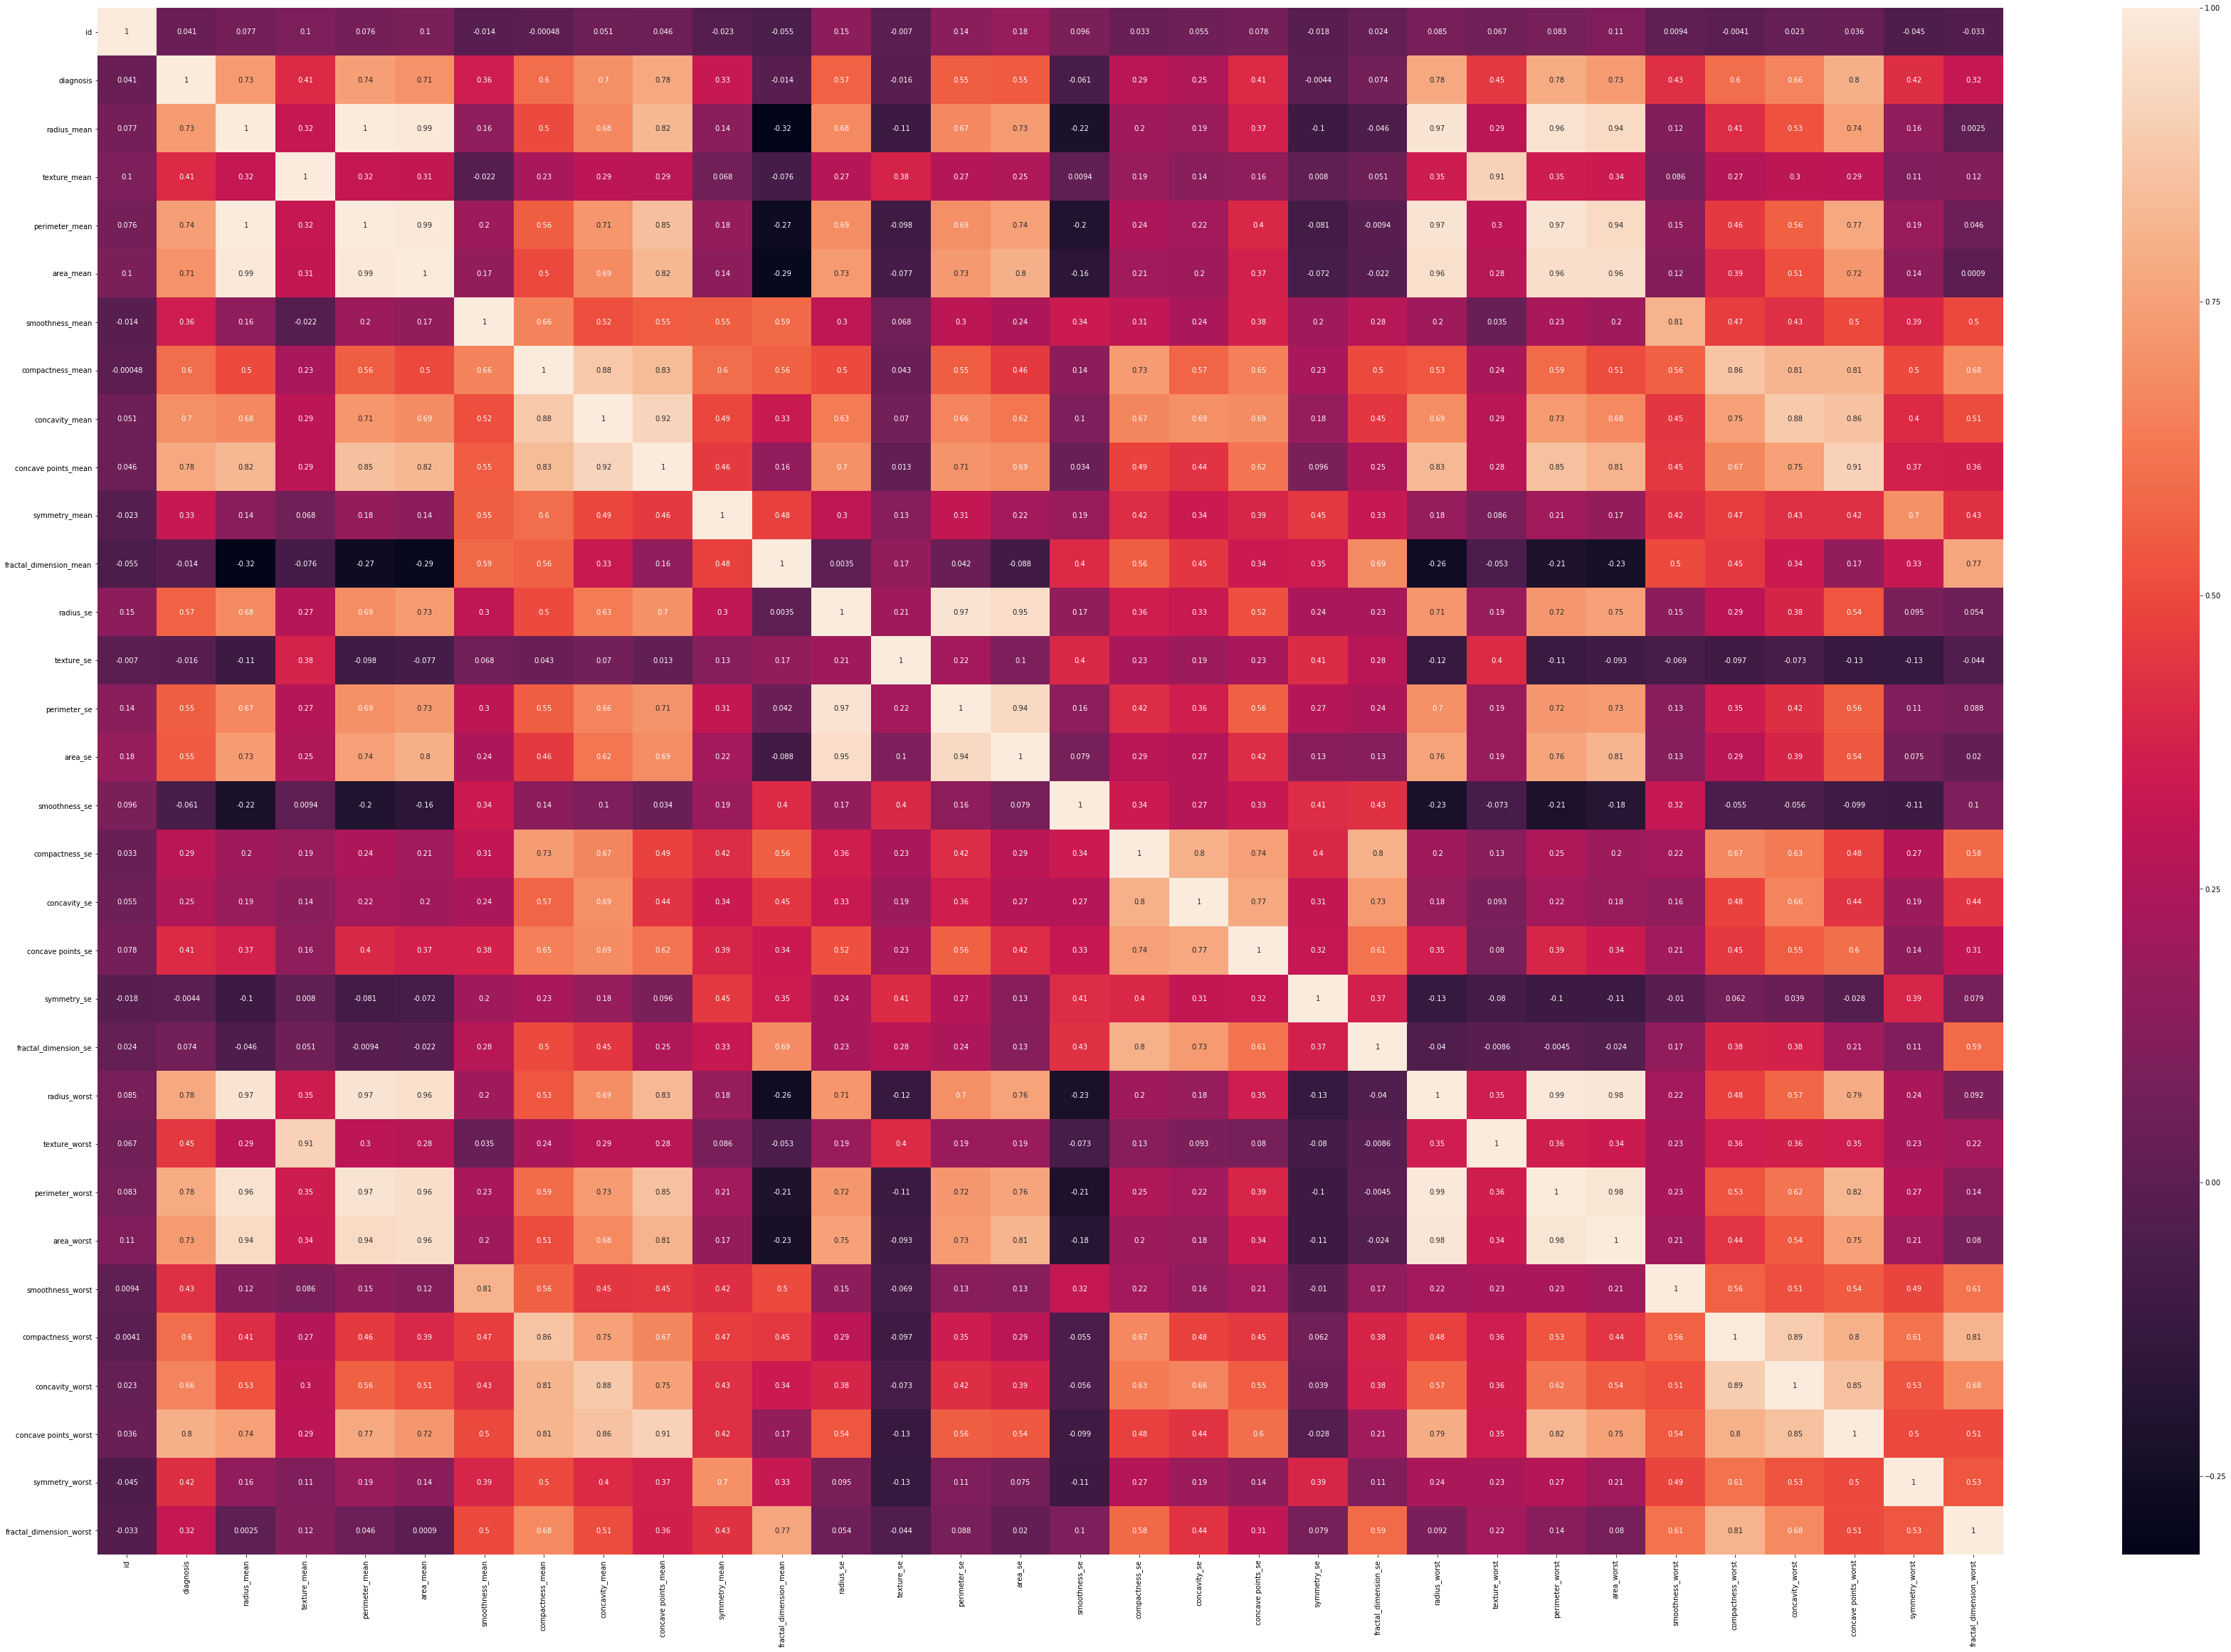

In [11]:
df1.corr()

fig, ax = plt.subplots(figsize=(60, 40))
sns.heatmap(df1.corr(), annot=True, ax=ax)

#### Select your features and target columns

Consider:
- Which column should be the target?
- Any other columns to exclude as features?

Note: You are not required to do SelectKBest

In [12]:
 # Clean up dataframe and select target
target = 'diagnosis'
features = df1.columns != target

X = df1.loc[:, features]
Y = df1[target]

#### Scale and visualize using PCA

In [13]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
# Create a PCA instance: pca
pca = PCA(n_components=2)
# Fit the PCA instance to the scaled samples
Z = pca.fit_transform(X_scaled)
print(Z.shape)
print(X_scaled.shape)
print(Y.shape)
Z

pca.explained_variance_ratio_

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


(560, 2)
(560, 31)
(560,)


array([0.42722437, 0.18392059])

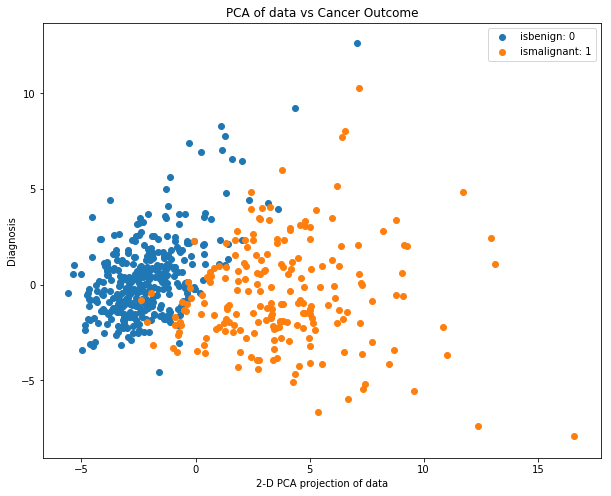

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(Z[Y==0, 0], Z[Y==0, 1], label='isbenign: 0')
ax.scatter(Z[Y==1, 0], Z[Y==1, 1], label='ismalignant: 1')
ax.set(title='PCA of data vs Cancer Outcome', xlabel='2-D PCA projection of data', ylabel='Diagnosis')
ax.legend()

### C. Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=8)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(420, 31) (140, 31) (420,) (140,)


### D. Train models

- Find 2 types of models to train
  -  Use cross_validate to select the best scoring model based on validation score

  - To pass the assessment, you should compare at least 2 types of models (there is no upper limit).
    - The model performance doesn't have to be the best possible, as long as you demonstrate how you compared them.

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV


#Cross Validate SVC with Grid-Search Tuning
X_scaler = StandardScaler()
Z_train = X_scaler.fit_transform(X_train)
Z_test = X_scaler.fit_transform(X_test)

model_svc = SVC(kernel='linear')
params = {
    'C': [0.01, 0.1, 1.0, 10],
    'gamma': [0.001, 0.01, 0.1]
}

gs_svc = GridSearchCV(model_svc, params, cv=5)
gs_svc.fit(Z_train, Y_train)
scores = cross_validate(gs_svc, Z_train, Y_train, cv=5,
                        return_train_score=True,
                        return_estimator=False)

final_score = gs_svc.score(Z_test, Y_test)
Y_pred_svc = gs_svc.predict(Z_test)

print(gs_svc.best_params_)
print(gs_svc.best_score_)
print(scores) 
print(final_score)

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


{'C': 0.1, 'gamma': 0.001}
0.9738095238095238
{'fit_time': array([0.54657817, 0.55447078, 0.54550195, 0.53752279, 0.58742285]), 'score_time': array([0.00099611, 0.00203514, 0.00103521, 0.00099993, 0.00099897]), 'test_score': array([0.95294118, 0.95294118, 0.97619048, 0.97590361, 1.        ]), 'train_score': array([0.99104478, 0.9880597 , 0.97916667, 0.98219585, 0.9851632 ])}
0.9857142857142858


In [17]:
print(Y_pred_svc)

[0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

#Cross Validate Logistic Regression Classifier
X_scaler = StandardScaler()
Z_train = X_scaler.fit_transform(X_train)
Z_test = X_scaler.fit_transform(X_test)

logreg = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(Z_train, Y_train)

final_score = logreg.score(Z_test, Y_test)
Y_pred_logreg = logreg.predict(Z_test)

print(scores) # accuracy
print(final_score)

{'fit_time': array([0.54657817, 0.55447078, 0.54550195, 0.53752279, 0.58742285]), 'score_time': array([0.00099611, 0.00203514, 0.00103521, 0.00099993, 0.00099897]), 'test_score': array([0.95294118, 0.95294118, 0.97619048, 0.97590361, 1.        ]), 'train_score': array([0.99104478, 0.9880597 , 0.97916667, 0.98219585, 0.9851632 ])}
0.9642857142857143


C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\line

In [19]:
print(Y_pred_logreg)

[0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0]


## Evaluation Metrics (20 points)

Determine which model you selected performs the best: [20 points]

### A. Model 1

- Get Predictions from the test set from train_test_split
- Generate classification_report
- Generate confusion_matrix

[learning_curve] Training set sizes: [ 27  90 153 216 279]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequ

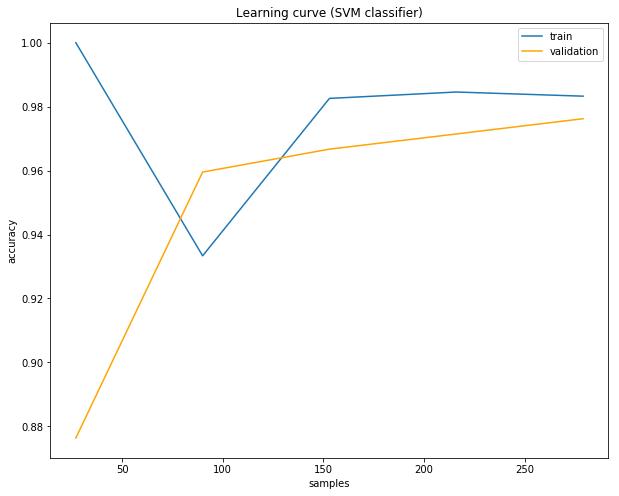

In [20]:
#Evaluate Linear SVC with grid-search
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
import seaborn as sns


sample_sizes, train_scores, val_scores = learning_curve(gs_svc, Z_train, Y_train, cv=3,
                                                        verbose=1, random_state=42)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='accuracy', title='Learning curve (SVM classifier)')
ax.legend()



In [21]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        91
           1       0.98      0.98      0.98        49

   micro avg       0.99      0.99      0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Prediction')]

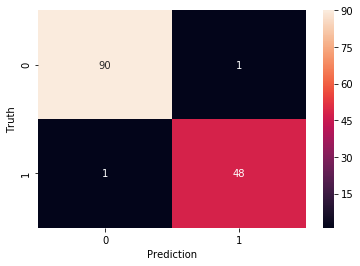

In [22]:
ax = sns.heatmap(confusion_matrix(Y_test, Y_pred_svc), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

### B. Model 2

- Get Predictions from the test set from train_test_split
- Generate classification_report
- Generate confusion_matrix

[learning_curve] Training set sizes: [ 27  90 153 216 279]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\s

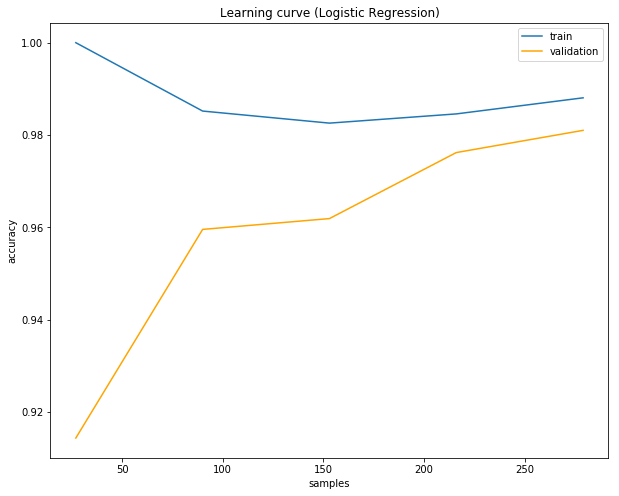

In [23]:
#Evaluate Logistic Regression Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
import seaborn as sns

logreg = LogisticRegression()
sample_sizes, train_scores, val_scores = learning_curve(logreg, Z_train, Y_train, cv=3,
                                                        verbose=1, random_state=42)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='accuracy', title='Learning curve (Logistic Regression)')
ax.legend()

In [24]:
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.96      0.94      0.95        49

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Prediction')]

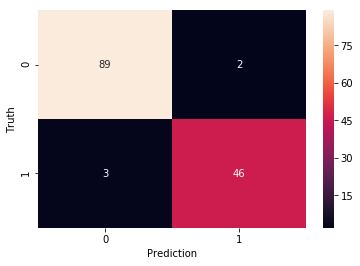

In [25]:
ax = sns.heatmap(confusion_matrix(Y_test, Y_pred_logreg), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

### C. Selected Model

- Analyse & Compare the Evaluation Metrics for Models 1 and 2
- Select 1 model based on evaluation metrics
- State reasons why you've selected this model
  - Consider: for this dataset (detecting cancer), which is more important? Reducing false positives or reducing false negatives?
  - There is no right or wrong answer, as long as you can explain your reasoning briefly and clearly.

#### Select Model 1: Higher precision, recall and validation score overall

The linear SVC classifier with grid search gives a higher validation accuracy score which is also indicated by its learning curve compared to logistic regression classifier. Its higher accuracy means it is able to predict outcomes correctly most of the time. Higher recall implies that out of all positives predicted, a greater proportion was correctly identified by Linear SVC classifier than Logistic Regression model.

In my opinion, reducing false positives whose actual outcome is malignant in reality is more important. Getting to know of benign tumour with accuracy is more important for this model so that the patient will be able to receive treatment on time. A case of inaccurate detection is better than a real case of developing cancer not being detected early for cure.

## Prediction (10 points)

Demonstrate how you will use the model in deployment [10 points]
  - Use data from prediction_data.csv. Note: this is a separate dataset from the training set above.
  - Get a prediction from your best model, print out the prediction (malignant or benign).

In [26]:
#Open and view prediction datas
pred_data = pd.read_csv('prediction_data.csv')
pred_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
2,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
3,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [27]:
#Save better model
from sklearn.metrics import accuracy_score

df_prediction_data = pd.read_csv('prediction_data.csv')

# select features
X_samples = df_prediction_data.loc[:, features]
y_samples = df_prediction_data[target]

# scale features
Z_samples = X_scaler.transform(X_samples)

# predict
result_encoded = gs_svc.predict(Z_samples)

# inverse transform
result = le.inverse_transform(result_encoded)

# print truth vs. result
for truth, pred in zip(y_samples, result):
    print('truth', truth, 'prediction', pred)
    
print('Accuracy', accuracy_score(y_samples, result))

truth M prediction M
truth M prediction M
truth M prediction M
truth B prediction B
Accuracy 1.0


C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
